# spaCy and networkx その２

Date: 2023/12/20

In [1]:
import re

In [2]:
with open('../data/pg35041_.txt') as f:
    text_ = f.read()

text = re.sub(r'_*\(\d+\)|_', '', text_)
print(text[:3000])

CHAPTER I. THE FAMILY OF BACH


If there is such a thing as inherited aptitude for art it certainly showed
itself in the family of Bach. For six successive generations scarcely two
or three of its members are found whom nature had not endowed with
remarkable musical talent, and who did not make music their
profession.

Veit Bach, ancestor of this famous family, gained a livelihood as a
baker at Pressburg in Hungary.  When the religious troubles of the
sixteenth century broke out he was driven to seek another place of abode,
and having got together as much of his small property as he could, retired
with it to Thuringia, hoping to find peace and security there.  He settled
at Wechmar, a village near Gotha, where he continued to ply his trade
as a baker and miller. In his leisure hours he was wont to amuse
himself with the lute, playing it amid the noise and clatter of the
mill.  His taste for music descended to his two sons and their
children, and in time the Bachs grew to be a very nume

In [3]:
cleaned_names =['Anna Magdalena',
 'Bach',
 'Beethoven',
 'Böhm',
 'Carl Philipp',
 'Carl Philipp Emmanuel',
 'Caspar Kerl',
 'Charles III',
 'Charles of Sicily',
 'Christopher Weigel',
 'Count Kaiserling',
 'Couperin',
 'Duke Christian of Weissenfels',
 'Duke Ernst',
 'Elias Gottlieb Haussmann',
 'Emmanuel Bach',
 'Fischer',
 'Frederick II',
 'Frescobaldi',
 'Friedemann',
 'Friedrich Müller',
 'Fritz',
 'Fritz Volbach',
 'Froberger',
 'Görner',
 'Handel',
 'Hasse',
 'Haussmann',
 'Hence Bach',
 'Herein Bach',
 'J. C. Gottsched',
 'Johann Ambrosius',
 'Johann Abraham Birnbaum',
 'Johann Adam Reinken',
 'Johann Ambrosius Bach',
 'Johann Bernhard Bach',
 'Johann Christian Hoffmann',
 'Johann Christoph',
 'Johann Christoph Bach',
 "Johann Christoph Friedrich's",
 'Johann G. Schübler',
 'Johann Gottlieb Görner',
 'Johann Heinrich Ernesti',
 'Johann Matthias Gesner',
 'Johann Michael Bach',
 'Johann Sebastian',
 'Johann Sebastian Bach',
 'Kerl',
 'Maria Amalia',
 'Marianne von Ziegler',
 'Müller',
 'Nicolas',
 'Pachelbel',
 'Paul Wagner',
 'Peters',
 'Philipp Telemann',
 'Regine Susanna',
 'Reinhard Keiser',
 'Sebastian Bach',
 'Veit Bach',
 'Vereinigte Zwietracht',
 'Vierstimmige Choralgesänge',
 'Vivaldi',
 'Vom Himmel',
 'Wahre Grundsätze',
 'Wasserflüssen Babylon',
 'Wilhelm Friedemann']

In [4]:
import spacy
from spacy.matcher import PhraseMatcher

In [5]:
nlp = spacy.load('en_core_web_trf')
doc = nlp(text)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/bitsandbytes/cextension.py:34: UserWarning: The installed version of bitsandbytes was compiled without GPU support. 8-bit optimizers, 8-bit multiplication, and GPU quantization are unavailable.
  warn("The installed version of bitsandbytes was compiled without GPU support. "


'NoneType' object has no attribute 'cadam32bit_grad_fp32'


In [6]:
#[sent.text.strip() for sent in doc.sents]
sents = [sent.text.strip().replace('\n', ' ') for sent in doc.sents]
sents[300:310]

['The Council retaliated by accusing Bach of neglecting his singing classes, absenting himself without leave, and of other irregularities.',
 '',
 'He was declared to be "incorrigible" and it was resolved (August 2, 1730) to sequestrate the Cantor\'s income, in other words, to withhold from him the perquisites to which he was entitled for the conduct of the Church services.',
 'Bach was not deterred from offering, three weeks later (August 23, 1730), a "sketch of what constitutes well-appointed Church music, with a few impartial reflections on its present state of decay" in Leipzig.',
 'The document reveals the conditions amid which Bach worked.',
 '',
 "Its representations may be summarised:  The foundation scholars of St. Thomas' are of four classes: Trebles, Altos, Tenors, Basses.",
 'A choir needs from four to eight "concertists" ( solo singers) and at least two "ripienists" to each chorus part, i.e. a minimum of twelve voices.',
 "The foundation scholars number fifty-five, by whom

In [7]:
REPLACE = {'Bach': 'Johann Sebastian Bach',
           'Johann Sebastian': 'Johann Sebastian Bach',
           'Sebastian Bach': 'Johann Sebastian Bach',
           'Carl Philipp': 'Carl Philipp Emanuel Bach',
           'Carl Philipp Emanuel': 'Carl Philipp Emanuel Bach',
           'Carl Philipp Emmanuel': 'Carl Philipp Emanuel Bach', 
           'Emmanuel Bach': 'Carl Philipp Emanuel Bach',            
           'Wilhelm Friedemann': 'Wilhelm Friedemann Bach',
           'Friedemann': 'Wilhelm Friedemann Bach',
           'Johann Christoph': 'Johann Christoph Bach',
           'Anna Magdalena': 'Anna Magdalena Bach',
           'Regine Susanna': 'Regine Susanna Bach',
           'Johann Ambrosius': 'Johann Ambrosius Bach'
          }

def align_name(name):
    name = name.replace("'s", "")
    if name in REPLACE:
        return REPLACE[name]
    else:
        return name

In [8]:
from itertools import combinations

matcher = PhraseMatcher(nlp.vocab)
patterns = [nlp.make_doc(name) for name in cleaned_names]
matcher.add('names', patterns)

comb = []
for doc in nlp.pipe(sents):
    #print(f'---{doc.text}')
    matches = matcher(doc)
    if len(matches) >= 2:
        matched = set()
        for match_id, start, end in matches:
            span = doc[start:end]
            name = align_name(span.text)
            matched.add(name)
        if len(matched) >= 2:
            comb.extend(combinations(matched, 2))

comb

[('Johann Sebastian Bach', 'Veit Bach'),
 ('Johann Sebastian Bach', 'Veit Bach'),
 ('Johann Sebastian Bach', 'Johann Christoph Bach'),
 ('Johann Christoph Bach', 'Carl Philipp Emanuel Bach'),
 ('Johann Sebastian Bach', 'Johann Michael Bach'),
 ('Johann Sebastian Bach', 'Johann Bernhard Bach'),
 ('Johann Ambrosius Bach', 'Johann Sebastian Bach'),
 ('Johann Ambrosius Bach', 'Johann Christoph Bach'),
 ('Caspar Kerl', 'Pachelbel'),
 ('Caspar Kerl', 'Fischer'),
 ('Caspar Kerl', 'Froberger'),
 ('Caspar Kerl', 'Kerl'),
 ('Caspar Kerl', 'Böhm'),
 ('Pachelbel', 'Fischer'),
 ('Pachelbel', 'Froberger'),
 ('Pachelbel', 'Kerl'),
 ('Pachelbel', 'Böhm'),
 ('Fischer', 'Froberger'),
 ('Fischer', 'Kerl'),
 ('Fischer', 'Böhm'),
 ('Froberger', 'Kerl'),
 ('Froberger', 'Böhm'),
 ('Kerl', 'Böhm'),
 ('Johann Sebastian Bach', 'Johann Christoph Bach'),
 ('Johann Sebastian Bach', 'Carl Philipp Emanuel Bach'),
 ('Johann Sebastian Bach', 'Carl Philipp Emanuel Bach'),
 ('Wilhelm Friedemann Bach', 'Carl Philipp Eman

In [9]:
import pandas as pd
relationships_df = pd.DataFrame(comb, columns=['source', 'target'])
relationships_df

,source,target
0,Johann Sebastian Bach,Veit Bach
1,Johann Sebastian Bach,Veit Bach
2,Johann Sebastian Bach,Johann Christoph Bach
3,Johann Christoph Bach,Carl Philipp Emanuel Bach
4,Johann Sebastian Bach,Johann Michael Bach
...,...,...
107,Johann Sebastian Bach,Count Kaiserling
108,Johann Sebastian Bach,Carl Philipp Emanuel Bach
109,Johann Sebastian Bach,Pachelbel
110,Wilhelm Friedemann Bach,Johann Sebastian Bach


In [10]:
all_characters = pd.concat([relationships_df['source'], relationships_df['target']]).unique()
all_characters

array(['Johann Sebastian Bach', 'Johann Christoph Bach',
       'Johann Ambrosius Bach', 'Caspar Kerl', 'Pachelbel', 'Fischer',
       'Froberger', 'Kerl', 'Wilhelm Friedemann Bach',
       'Johann Gottlieb Görner', 'Nicolas', 'Müller', 'Maria Amalia',
       'Charles of Sicily', 'Johann Abraham Birnbaum',
       'Marianne von Ziegler', 'Johann Christian Hoffmann', 'Peters',
       'Elias Gottlieb Haussmann', 'Fritz', 'Couperin', 'Böhm',
       'Herein Bach', 'Reinhard Keiser', 'Carl Philipp Emanuel Bach',
       'Hasse', 'Duke Christian of Weissenfels', 'Hence Bach',
       'Veit Bach', 'Johann Michael Bach', 'Johann Bernhard Bach',
       'Görner', 'Paul Wagner', 'Anna Magdalena Bach', 'Friedrich Müller',
       'Vereinigte Zwietracht', 'Charles III', 'J. C. Gottsched',
       'Haussmann', 'Fritz Volbach', 'Regine Susanna Bach',
       'Johann Christoph Friedrich', 'Frescobaldi', 'Handel',
       'Vierstimmige Choralgesänge', 'Duke Ernst', 'Vom Himmel',
       'Count Kaiserling'], dt

In [11]:
relationships_df['weight'] = 1
relationships_df_ = relationships_df.groupby(['source', 'target'], sort=False, as_index=False).sum()
relationships_df_.head()

,source,target,weight
0,Johann Sebastian Bach,Veit Bach,2
1,Johann Sebastian Bach,Johann Christoph Bach,2
2,Johann Christoph Bach,Carl Philipp Emanuel Bach,1
3,Johann Sebastian Bach,Johann Michael Bach,1
4,Johann Sebastian Bach,Johann Bernhard Bach,1


In [12]:
import networkx as nx
G = nx.from_pandas_edgelist(relationships_df_,
                            source = 'source',
                            target = 'target',
                            edge_attr = 'weight',
                            create_using=nx.Graph())

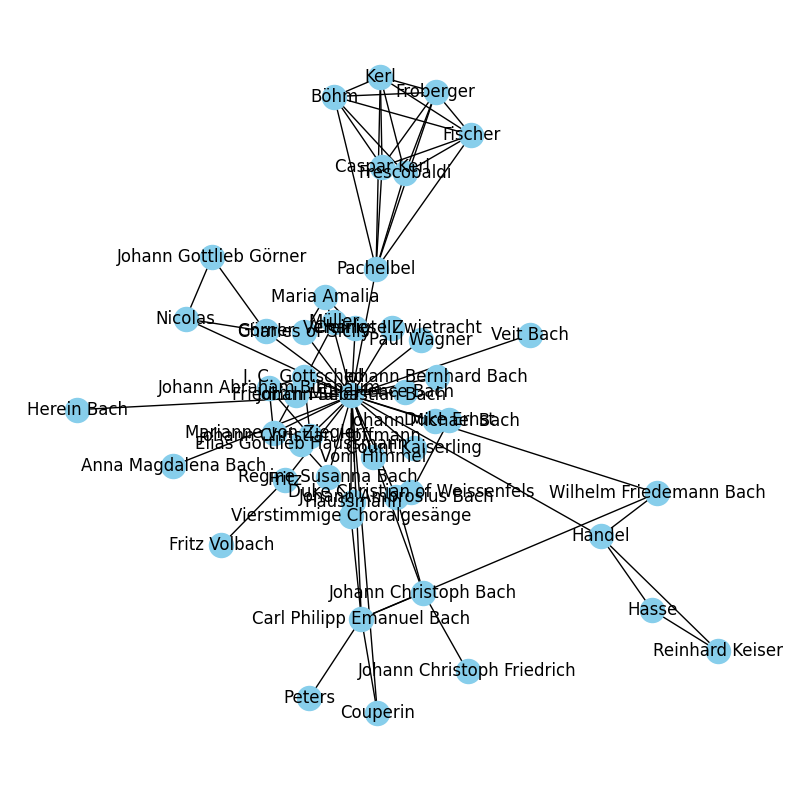

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, ax=ax, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos=pos)
plt.show()

In [14]:
from pyvis.network import Network
net = Network(notebook=True, width='1000px', height='700px', bgcolor='#222222', font_color='white', cdn_resources='in_line')

node_degree = dict(G.degree)
nx.set_node_attributes(G, node_degree, 'size')

net.from_nx(G, edge_scaling=True, show_edge_weights=True)
net.show('bach.html')

bach.html


In [15]:
degree_dict = nx.degree_centrality(G)
degree_dict

{'Johann Sebastian Bach': 0.6170212765957447,
 'Veit Bach': 0.02127659574468085,
 'Johann Christoph Bach': 0.0851063829787234,
 'Carl Philipp Emanuel Bach': 0.1276595744680851,
 'Johann Michael Bach': 0.02127659574468085,
 'Johann Bernhard Bach': 0.02127659574468085,
 'Johann Ambrosius Bach': 0.0425531914893617,
 'Caspar Kerl': 0.10638297872340426,
 'Pachelbel': 0.14893617021276595,
 'Fischer': 0.1276595744680851,
 'Froberger': 0.1276595744680851,
 'Kerl': 0.1276595744680851,
 'Böhm': 0.1276595744680851,
 'Wilhelm Friedemann Bach': 0.06382978723404255,
 'Johann Gottlieb Görner': 0.0425531914893617,
 'Nicolas': 0.06382978723404255,
 'Görner': 0.06382978723404255,
 'Paul Wagner': 0.02127659574468085,
 'Anna Magdalena Bach': 0.02127659574468085,
 'Müller': 0.02127659574468085,
 'Friedrich Müller': 0.02127659574468085,
 'Vereinigte Zwietracht': 0.02127659574468085,
 'Maria Amalia': 0.06382978723404255,
 'Charles of Sicily': 0.06382978723404255,
 'Charles III': 0.06382978723404255,
 'Johann

<Axes: >

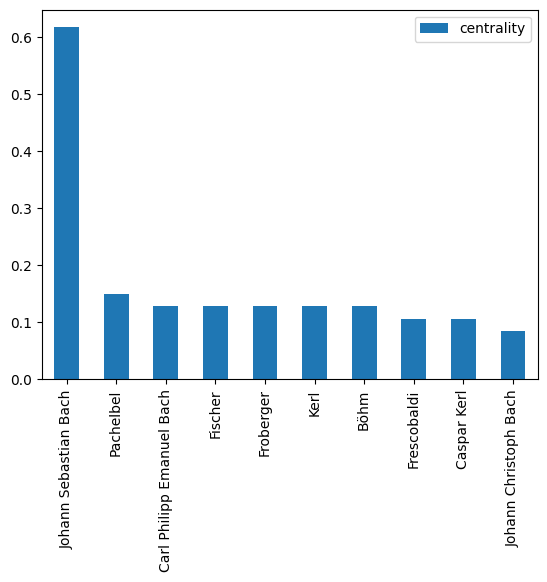

In [16]:
degree_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns=['centrality'])
degree_df.sort_values('centrality', ascending=False)[:10].plot(kind='bar')

<Axes: >

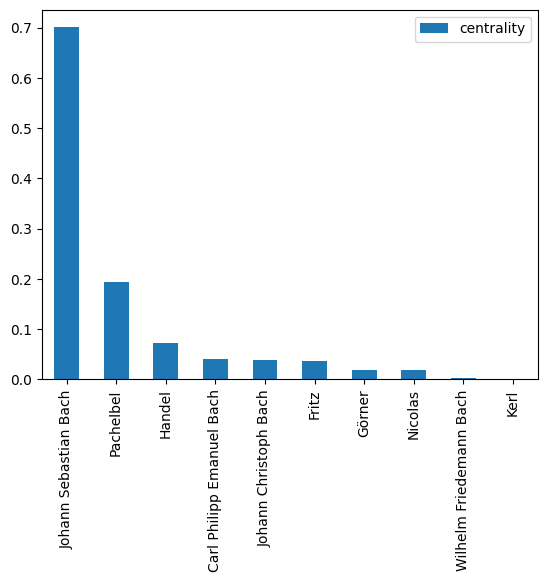

In [17]:
betweenness_dict = nx.betweenness_centrality(G)
betweenness_df = pd.DataFrame.from_dict(betweenness_dict, orient='index', columns=['centrality'])
betweenness_df.sort_values('centrality', ascending=False)[:10].plot(kind='bar')

<Axes: >

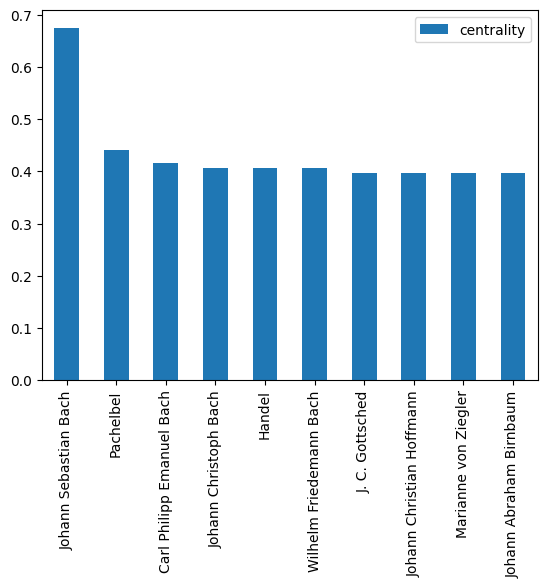

In [18]:
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient='index', columns=['centrality'])
closeness_df.sort_values('centrality', ascending=False)[:10].plot(kind='bar')

In [19]:
from community import community_louvain

communities = community_louvain.best_partition(G)

In [20]:
nx.set_node_attributes(G, communities, 'group')

In [21]:
com_net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show_buttons(filter_=['physics'])
com_net.show("bach_communities.html")

bach_communities.html
